In [1]:
# Load libraries
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings


In [2]:
pip install upgrade scikit-learn pandas


ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Define the labels for the sleep health datafile
col_names = ['Gender','Age','Job', 'Sleep', 'Quality', 'Activity', 'Stress', 'Weight', 'Blood', 'BPM', 'Steps','Disorder']

# load dataset
df = pd.read_csv("sleep.health.csv", header = 0, names = col_names)


In [4]:
df.head()

,Gender,Age,Job,Sleep,Quality,Activity,Stress,Weight,Blood,BPM,Steps,Disorder
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.shape

(374, 12)

In [6]:
df.info

<bound method DataFrame.info of      Gender  Age                   Job  Sleep  Quality  Activity  Stress  \
1      Male   27     Software Engineer    6.1        6        42       6   
2      Male   28                Doctor    6.2        6        60       8   
3      Male   28                Doctor    6.2        6        60       8   
4      Male   28  Sales Representative    5.9        4        30       8   
5      Male   28  Sales Representative    5.9        4        30       8   
..      ...  ...                   ...    ...      ...       ...     ...   
370  Female   59                 Nurse    8.1        9        75       3   
371  Female   59                 Nurse    8.0        9        75       3   
372  Female   59                 Nurse    8.1        9        75       3   
373  Female   59                 Nurse    8.1        9        75       3   
374  Female   59                 Nurse    8.1        9        75       3   

         Weight   Blood  BPM  Steps     Disorder  
1   

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    374 non-null    object 
 1   Age       374 non-null    int64  
 2   Job       374 non-null    object 
 3   Sleep     374 non-null    float64
 4   Quality   374 non-null    int64  
 5   Activity  374 non-null    int64  
 6   Stress    374 non-null    int64  
 7   Weight    374 non-null    object 
 8   Blood     374 non-null    object 
 9   BPM       374 non-null    int64  
 10  Steps     374 non-null    int64  
 11  Disorder  155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [8]:
df.describe()

,Age,Sleep,Quality,Activity,Stress,BPM,Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [9]:
df.isnull().sum()

Gender        0
Age           0
Job           0
Sleep         0
Quality       0
Activity      0
Stress        0
Weight        0
Blood         0
BPM           0
Steps         0
Disorder    219
dtype: int64

In [10]:
df.duplicated().sum()

242

In [11]:
#The missing values probably mean that the person doesn't have a sickness
#Replace NaN-s with No Disorder
df["Disorder"] = df["Disorder"].fillna("No Disorder")

In [12]:
#Separate the Blood Pressure values to Systolic and Diastolic
df[["Systoli", "Diastolic"]] = df["Blood"].str.split("/", expand = True).astype(int)

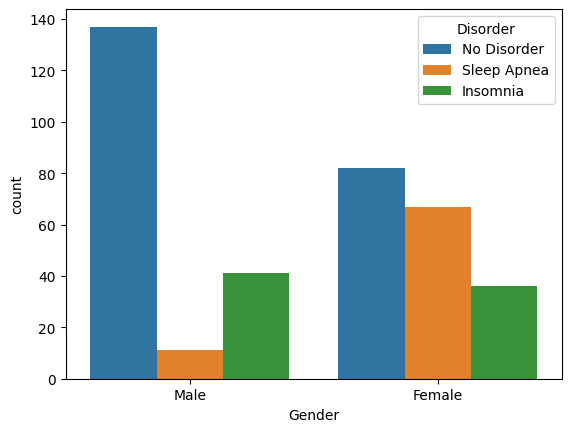

In [13]:
#Sleep disorder based on gender
sns.countplot(x = "Gender", hue = "Disorder", data = df);

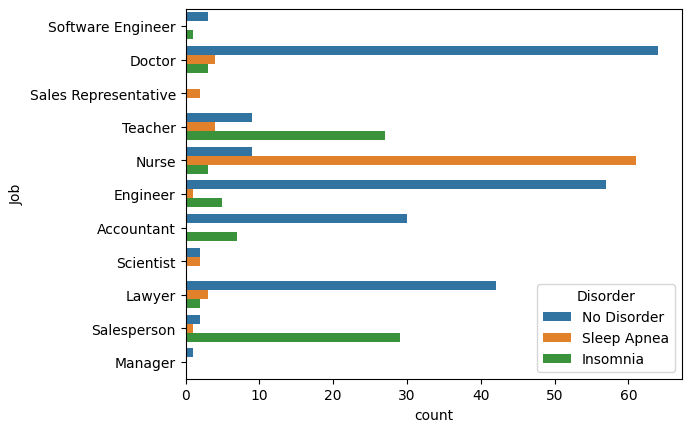

In [14]:
#Sleep disorder based on occupation
sns.countplot(y = "Job", hue = "Disorder", data = df);

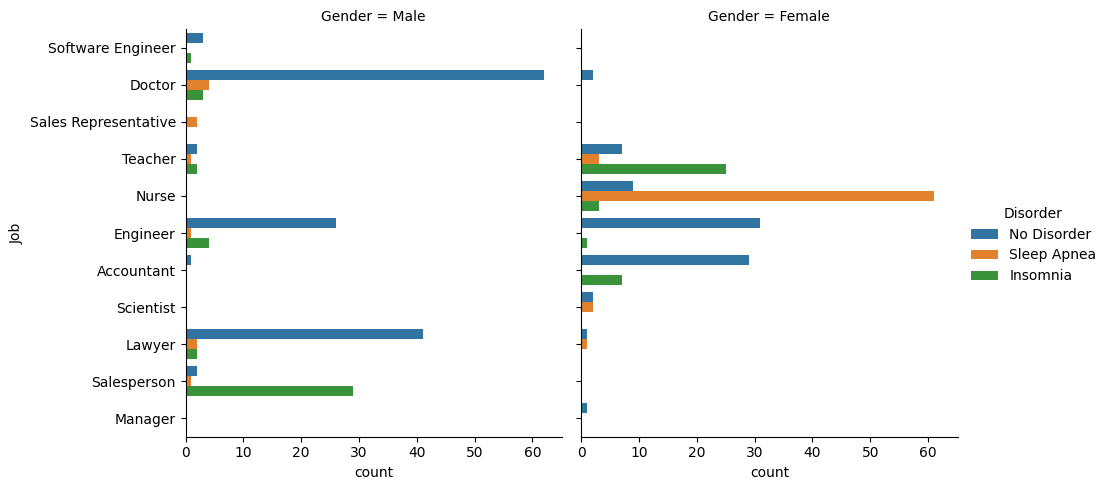

In [15]:
#Let's see, which occupations are more threatened by sleeping disorders based also on gender, to check for imbalances
sns.catplot(y="Job", hue="Disorder",col= "Gender",kind = "count", data=df)
plt.show()

It seems there is a strong cofounding factor of occupation. We can see that jobs which probably pay less, like nurse are done by females
while higher paying jobs. like doctor, by men

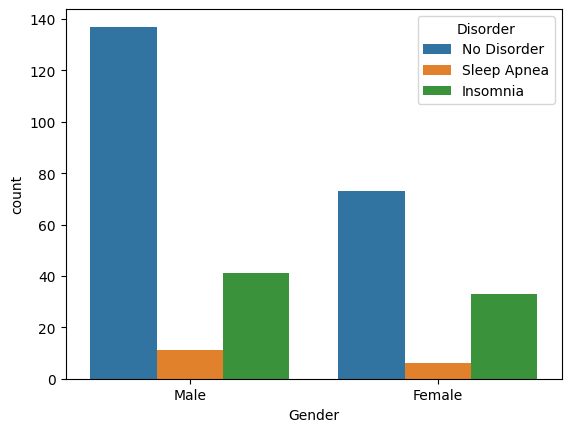

In [16]:
#It seems there is a strong cofounding factor of occupation. We can see that jobs which probably pay less, like nurse are done by females
#while higher paying jobs. like doctor, by men.
#Lets see the distribution in gender if we don't include the nurses
no_nurse = df.loc[df["Job"] != "Nurse"]
sns.countplot(x = "Gender", hue = "Disorder", data = no_nurse);

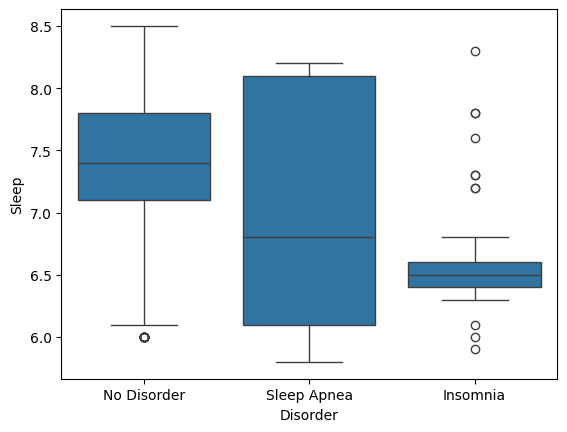

In [17]:
#Create boxplots about the sleep length
sns.boxplot(x = "Disorder",  y = "Sleep", data = df);

In [18]:
#Let's find out if there are some other variables, which are pushing nurses to the direction of sleep apnea
#First make another correlation, but now numeric values for sleep disorders

sleep_dummies = pd.get_dummies(df["Disorder"])
sleep_new = df.drop("Disorder", axis = 1)
sleep_disorders = pd.concat([sleep_new, sleep_dummies], axis = 1)

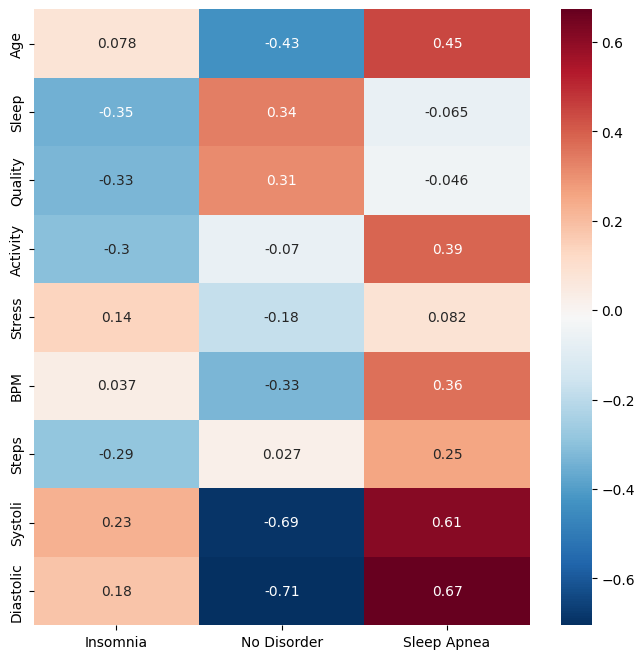

In [19]:
#Make a heatmap, see what variables are connected to which outcome
corr_2 = sleep_disorders.corr(numeric_only = True)
plt.figure(figsize = (8,8))
sns.heatmap(corr_2.iloc[:-3, -3:], annot = True, cmap='RdBu_r');

In [20]:
#First I do a map for the values in Weight then I replace them.
mapping = {"Normal": 1, "Normal Weight" : 1, "Overweight": 2, "Obese": 3}
sleep_disorders["Weight"] = sleep_disorders["Weight"].replace(mapping).astype(int)

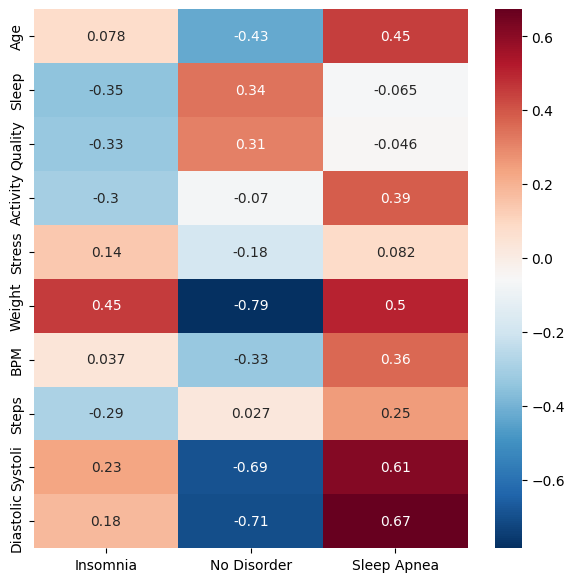

In [21]:
#Hope for a bit clearer result, do the same correlation again with BMI
corr_3 = sleep_disorders.corr(numeric_only = True)
plt.figure(figsize = (7,7))
sns.heatmap(corr_3.iloc[:-3, -3:], annot = True, cmap='RdBu_r');

We have many interesting findings. First of all, I think te real absence of the correlation in this case would be a value closer to the "No Disorder" column.
What we want to have and the "normal" state is without disease, so in real world we want values which are associated with no disorder.
Age is correlated with sleep apnea, but not with insomnia, and could be a good predictor for the absecence of a disease. 
Sleep duration and quality is not affecting sleep apnea so much.But in this case it is clearly visible, that the presence of a  disorder
affects the sleep quality and duration negatively, without disorder, these values are higher.
Physical activity is an interesting one, 

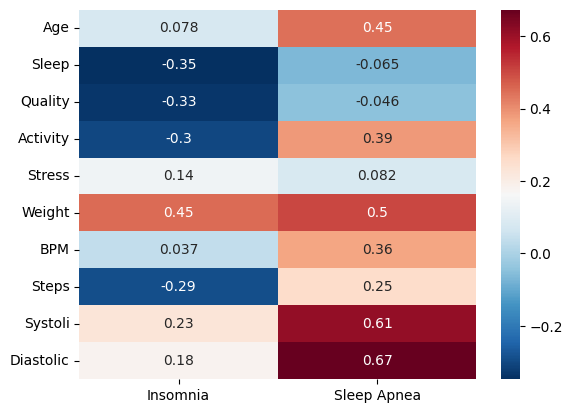

In [22]:
no_normal = sleep_disorders.drop("No Disorder", axis = 1)
correlation_4 = no_normal.corr(numeric_only = True)
sns.heatmap(correlation_4.iloc[:-2, -2:], annot = True, cmap='RdBu_r');

In [23]:
#Make a train and a test set
from sklearn.model_selection import train_test_split
y = sleep_disorders[["No Disorder", "Insomnia", "Sleep Apnea"]]
X = sleep_disorders.drop(["Insomnia", "No Disorder", "Sleep Apnea", "Blood"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [24]:
#Generating dummies and standardize
X_train = pd.get_dummies(X_train, columns=["Gender", "Job"])
X_test = pd.get_dummies(X_test, columns=["Gender", "Job"])
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [25]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Assuming df is your DataFrame with mixed types
# Convert all columns to numeric, coerce non-numeric values to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Assuming X and y are your features and target variable
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Gender', axis=1), df['Gender'], test_size=0.2, random_state=42)

# Separate categorical and numerical columns
categorical_columns = ['Gender']  # Replace with your actual categorical column names
numerical_columns = [col for col in X_train.columns if col not in categorical_columns]

# Create a column transformer to apply different preprocessing to numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Create a pipeline with preprocessing and KNN classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', knn)
])

# Define the parameter grid
param_grid = {'knn__n_neighbors': [1, 3, 5, 6, 7, 9, 11],
              'knn__weights': ['uniform', 'distance']}

# Create a GridSearchCV object with error_score='raise'
grid_search = GridSearchCV(pipeline, param_grid, cv=5, error_score='raise')

# Fit the GridSearchCV object to the data
try:
    grid_search.fit(X_train, y_train)
except Exception as e:
    print(f"Error during fitting: {e}")

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Now, y_pred contains the predicted values for your test set
print(y_pred)



Error during fitting: A given column is not a column of the dataframe


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [36]:
from sklearn import metrics
#Create the labels for the matrix
disease_labels = ["Insomnia", "No Disorder", "Sleep Apnea"] 
#Create a confusion matrix
cm = metrics.confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
# Create a figure object
fig = plt.figure()
# Add an ax object to the figure
ax = fig.add_subplot(111)
#Create the visualisation
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
sns.heatmap(cm, annot=True, fmt='g', xticklabels=disease_labels, yticklabels=disease_labels);

NameError: name 'y_pred' is not defined

In [ ]:
sns.pairplot(df)

In [ ]:
df.dtypes

In [ ]:
df.isnull().values.any()

In [ ]:
# Convert all string columns to float
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types after conversion
print(df.dtypes)


In [ ]:
# Explore the dataset
print(df.info())
print(df.describe())

# Visualize correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




In [ ]:
# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Job'] = label_encoder.fit_transform(df['Job'])

# Split data into features and target
X = df[['Age', 'Job', 'Quality', 'Activity', 'Stress', 'Blood', 'BPM', 'Steps']]
y = df['Sleep']  # Assuming you may still want to predict the 'Disorder' column


In [ ]:
import sklearn
print(sklearn.show_versions())

In [ ]:
# Update scikit-learn only
pip install --upgrade scikit-learn

# Update pandas only
pip install --upgrade pandas
